In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import re

from collections import Counter
from wordcloud import WordCloud, STOPWORDS 
from sklearn.feature_extraction.text import CountVectorizer

stopwords = set(STOPWORDS)
stopwords.add('')

In [9]:
def bagoword_review(lst, stopwords):
    cnt = Counter()
    for word in lst:
        if word not in stopwords:
                cnt[word]+=1
    return cnt

def bagoword_corpus(lst, stopwords):
    cnt = Counter()
    for r in lst:
        for word in wordlist(r):
            if word not in stopwords:
                cnt[word]+=1
    return cnt


def wordlist(review):
    #Convert a review into a list of words(strings)
    lines = review.split(' ')
    symbols = '${}()[].,:;+-*/&|<>=~" '
    words = map(lambda Element: Element.translate(str.maketrans("", "", symbols)).strip().lower(), lines)
    return list(words)

In [10]:
df = pd.read_csv('../train.csv')

In [11]:
df.head()

,ex_id,user_id,prod_id,rating,label,date,review
0,0,923,0,3.0,1,2014-12-08,The food at snack is a selection of popular Gr...
1,1,924,0,3.0,1,2013-05-16,This little place in Soho is wonderful. I had ...
2,2,925,0,4.0,1,2013-07-01,ordered lunch for 15 from Snack last Friday. ...
3,3,926,0,4.0,1,2011-07-28,This is a beautiful quaint little restaurant o...
4,4,927,0,4.0,1,2010-11-01,Snack is great place for a casual sit down lu...


In [12]:
df[df['label']==1]['review']

0         The food at snack is a selection of popular Gr...
1         This little place in Soho is wonderful. I had ...
2         ordered lunch for 15 from Snack last Friday.  ...
3         This is a beautiful quaint little restaurant o...
4         Snack is great place for a  casual sit down lu...
                                ...                        
250677    This place is amazing, I loved it so much that...
250678    I love this place. Drinks are great, atmospher...
250679    Bijan is the best bar I have been to in Brookl...
250680    Great local lounge spot! After work and regula...
250793    First and last time we try this place.  Pizza ...
Name: review, Length: 25819, dtype: object

In [13]:
df[df['label']==0]['review']

11        I had the braised lamb sandwich and was one of...
12        This spot is close to my job so I decided to c...
13        Needed a quick, healthy light "lunch" and this...
14        Their artichoke chicken salad is good and plenty.
15        Needed a quick bite and stopped here because o...
                                ...                        
250869    Made a reservation for an early dinner Saturda...
250870    Emily is like Franny's Marco, but with warmth ...
250871    Can't say enough good things about this place....
250872    Had a great dinner here- fantastic pizza, the ...
250873    Pizza Loves Emily and I love Emily's pizza. Th...
Name: review, Length: 225055, dtype: object

### Notes

- Many more genuine reviews than fake (stratified training?)
- high overlap in word frequency

In [14]:
# Fake Review Bag Of Words & WordCloud
bow_fake = bagoword_corpus(df[df['label']==1]['review'], stopwords)
bow_fake_sort = sorted(bow_fake.items(), key=lambda x: x[1], reverse=True)

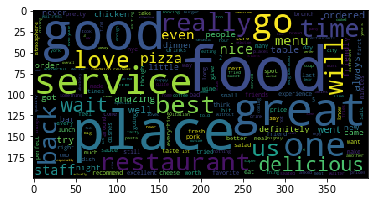

In [15]:
wc_fake = WordCloud(stopwords=stopwords).generate_from_frequencies(bow_fake)
plt.imshow(wc_fake) 

In [16]:
# Genuine Review Bag Of Words & WordCloud
bow_real = bagoword_corpus(df[df['label']==0]['review'], stopwords)
bow_real_sort = sorted(bow_real.items(), key=lambda x: x[1], reverse=True)

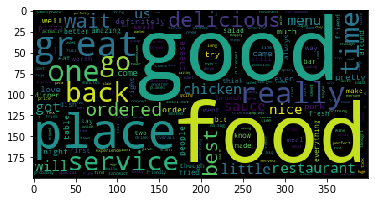

In [17]:
wc_real = WordCloud(stopwords=stopwords).generate_from_frequencies(bow_real)
plt.imshow(wc_real) 

In [32]:
#OHE
cleanlist = []

for r in df['review']:
    a = re.sub(r'[^\w]', ' ', r.lower())
    #for s in stopwords:
        #a = re.sub(' '+s+' ', ' ', a)
    cleanlist.append(a)
    
cv = CountVectorizer(binary=True)
X = cv.fit_transform(cleanlist)


In [30]:
print(X.shape)

(250874, 108414)


193